# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
import chardet
from zipfile import ZipFile
import pandas as pd
import re

from urllib import request

file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
download_file("PoliceShootingsUS.zip", file_url)

In [2]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 
        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 
unzip("PoliceShootingsUS.zip")
with open('PoliceShootingsUS.csv', 'rb') as f:
    content = f.read()
    result = chardet.detect(content)
print(result)


File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!
{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [3]:
## Your code is here
df=pd.read_csv('PoliceShootingsUS.csv', encoding=result['encoding'])
df[df['age']>50].id.count()

401

* What's the age distribution?

<AxesSubplot:xlabel='age'>

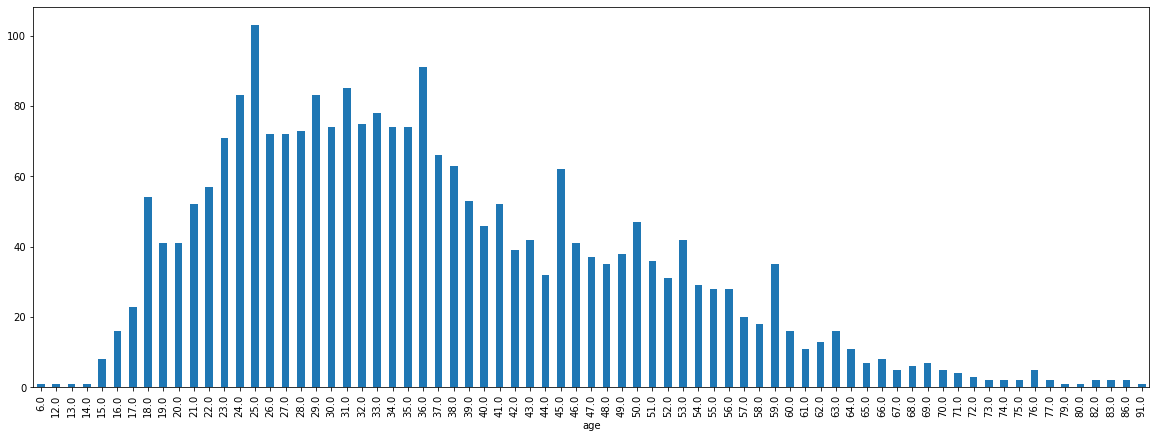

In [4]:
## Your code is here
df.groupby('age').age.count().plot.bar(figsize=(20, 7))

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [5]:
## Your code is here
mylist=[]
with open('volunteers.txt', 'r') as file:
    while(True):
        data=file.readline()
        lst=re.findall("[a-zA-Z]+", data)
        templist= lst[1:4]
        mylist.append(templist)
        if not data:
            break


In [8]:
df=pd.DataFrame(mylist, columns=["Firstname", "Lastname", "State"]).dropna()
df

,Firstname,Lastname,State
0,Harding,Christine,Virginia
1,Davis,Kimberly,New
2,Ingram,Rachel,Louisiana
3,Walker,Richard,Oregon
4,Barnes,Francisco,Virginia
...,...,...,...
95,Smith,Kevin,North
96,Moore,Mark,Alaska
97,Landry,Jennifer,Wyoming
98,Phillips,Lori,Arkansas
